In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
# Load training text file
Data_train = np.loadtxt('training_data.txt', skiprows = 1)
X_train = Data_train[:, 1:]
y_train = Data_train[:, 0]
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (20000, 1000)
y_train shape: (20000,)


In [46]:
for i in range(len(X_train[0])):
    col = X_train[:, i]
    mean = np.mean(col)
    std = np.std(col)
    X_train[:, i] = (col - mean) / std

In [3]:
logic = LogisticRegression(C = 10000)
logic.fit(X_train,y_train)
w= logic.coef_

loss = 0.0
l = 0.0
for i in range(len(y_train)):
    if np.sign(logic.predict(X_train[[i]])) != np.sign(y_train[i]):
        l += 1
    a = 1.0 / (1.0 + np.exp(-y_train[i]*np.dot(w[0], X_train[i])))
    loss -= np.log(a)

In [50]:
def E(y, predictions):
    return np.sum(np.not_equal(y, predictions)) / len(y)
c_vals = [1,5,10,50,100,500,1000,5000,10000,50000]
in_error = []
val_error = []
for i in c_vals:
    logic = LogisticRegression(C = i)
    kf = KFold(n_splits=10, shuffle=True)
    
    E_in = []
    E_val = []
    for train_indices, val_indices in kf.split(X_train):

        # X_in and X_val are subsets of X_train
        X_in = X_train[train_indices]
        X_val = X_train[val_indices]
        y_in = y_train[train_indices]
        y_val = y_train[val_indices]

        # Fit
        logic.fit(X_in, y_in)

        # Compute errors
        e_in = E(y_in, logic.predict(X_in))
        e_val = E(y_val, logic.predict(X_val))
        E_in.append(e_in)
        E_val.append(e_val)
    in_error.append(E_in)
    val_error.append(E_val)

1 : In sample average: 0.122961111111   Validation average: 0.1536
5 : In sample average: 0.122811111111   Validation average: 0.1547
10 : In sample average: 0.122677777778   Validation average: 0.1546
50 : In sample average: 0.122394444444   Validation average: 0.15215
100 : In sample average: 0.122738888889   Validation average: 0.15235
500 : In sample average: 0.122888888889   Validation average: 0.15075
1000 : In sample average: 0.1227   Validation average: 0.1541
5000 : In sample average: 0.122905555556   Validation average: 0.15275


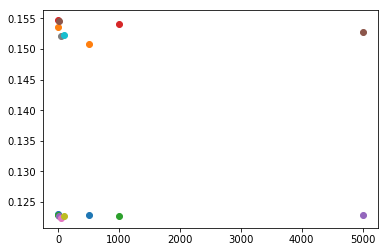

In [51]:
for i in range(len(c_vals)-2):
    plt.plot(c_vals[i], np.average(in_error[i]), marker = 'o')
    plt.plot(c_vals[i],np.average(val_error[i]),marker = 'o')
    print(c_vals[i], ": In sample average:", np.average(in_error[i]) , "  Validation average:", np.average(val_error[i]))

In [52]:
logic = LogisticRegression(C = 50)
logic.fit(X_train,y_train)
w= logic.coef_

loss = 0.0
l = 0.0
for i in range(len(y_train)):
    if np.sign(logic.predict(X_train[[i]])) != np.sign(y_train[i]):
        l += 1
    a = 1.0 / (1.0 + np.exp(-y_train[i]*np.dot(w[0], X_train[i])))
    loss -= np.log(a)

In [53]:
l

2488.0

In [54]:
1-2488/20000.0

0.8756